# TP de SD204


## Antoine HABIS

## Question 1

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import math
import scipy
from numpy import rank, matrix
from sklearn.linear_model import LinearRegression



with open(r'C:\Users\Antoine\Downloads\pièces jointes\invest.txt', 'r') as in_file:
    
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('invest.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)


fixed_df = pd.read_csv(r'C:\Users\Antoine\Downloads\pièces jointes\invest.txt', sep=' ', encoding='latin1', engine='python')
pd.options.mode.chained_assignment = None
fixed_df

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


# Question 2

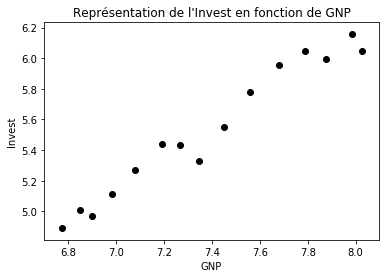

In [19]:
X=fixed_df["gnp"]
Y=fixed_df["invest"]
Z=fixed_df["interest"]
n=len(X)
plt.scatter(X,Y,color='k')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.title("Représentation de l'Invest en fonction de GNP")
plt.show()

## Question 3

In [3]:
def mean(X):
    n=0
    M=0
    for i in range (len(X)):
        M+=X[i]
        n+=1
    return M/n

In [4]:
X=fixed_df["gnp"]
Y=fixed_df["invest"]
for i in range (n):
    X[i]=math.log(X[i])
    Y[i]=math.log(Y[i])

In [5]:
C1=0
C2=0
for i in range (n):
    C1+=(X[i]-mean(X))*(Y[i]-mean(Y))
for i in range (n):
    C2+=(X[i]-mean(X))**(2)
beta1=C1/C2 
beta0=mean(Y)-beta1*mean(X) 
Y_=[]
for i in range (n):
    Y_.append(beta0+beta1*X[i])
numerateur=(Y_-mean(Y))**(2)
denominateur=(Y-mean(Y))**(2)
R=math.sqrt(sum(numerateur)/sum(denominateur))
print('the value of beta1 is: '+str(beta1)+'\n'+
      'the value of beta0 is: '+str(beta0)+'\n'+
      'the value of R is: '+str(R))
    

    

the value of beta1 is: 1.015281401598871
the value of beta0 is: -1.9635913352301833
the value of R is: 0.9812019647380378


## Question 4

In [6]:
C4=(Y-(beta0+beta1*X))**(2)
sigma_carre=1/(n-2)*(sum(C4))
Var_beta1=sigma_carre/C2
test1=beta1/math.sqrt(Var_beta1)
p_value=2*(1-scipy.stats.t.cdf(test1, n-2))
print('the test statistic value : '+str(test1)+'\n'+
      'and the p value : '+str(p_value)
     )

the test statistic value : 18.33198445686668
and the p value : 1.1363709973011282e-10


## Question 5

In [7]:
Interval=scipy.stats.t.interval(0.90, n-2, loc=0, scale=1)
x=Interval[1]
print(x)

1.7709333959867988


In [8]:
CI_1000_bas=beta0+beta1*math.log(1000)-x*math.sqrt(sigma_carre)*math.sqrt(1/n+(math.log(1000)-mean(X))**(2)/(C2))
CI_1000_haut=beta0+beta1*math.log(1000)+x*math.sqrt(sigma_carre)*math.sqrt(1/n+(math.log(1000)-mean(X))**(2)/(C2))

PI_1000_bas=beta0+beta1*math.log(1000)-x*math.sqrt(sigma_carre)*math.sqrt(1+1/n+(math.log(1000)-mean(X))**(2)/(C2))
PI_1000_haut=beta0+beta1*math.log(1000)+x*math.sqrt(sigma_carre)*math.sqrt(1+1/n+(math.log(1000)-mean(X))**(2)/(C2))

print('the confidence interval is:['+str(CI_1000_bas)+';'+str(CI_1000_haut)+']'+
     '\n'+'the prediction interval is:['+str(PI_1000_bas)+';'+str(PI_1000_haut)+']')

the confidence interval is:[4.988222845971109;5.111225406662491]
the prediction interval is:[4.882820023438679;5.216628229194921]


## Question 6

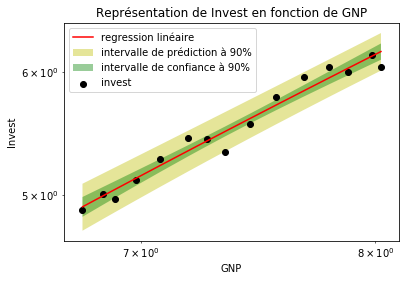

In [9]:
regline=beta0+beta1*X
plt.plot(X,regline,'r',label='regression linéaire')
CI_bas=[]
CI_haut=[]
PI_bas=[]
PI_haut=[]
for i in range (n):
    CI_bas.append(beta0+beta1*X[i]-x*math.sqrt(sigma_carre)*math.sqrt(1/n+(X[i]-mean(X))**(2)/(C2)))
    CI_haut.append(beta0+beta1*X[i]+x*math.sqrt(sigma_carre)*math.sqrt(1/n+(X[i]-mean(X))**(2)/(C2)))
    PI_bas.append(beta0+beta1*X[i]-x*math.sqrt(sigma_carre)*math.sqrt(1+1/n+(X[i]-mean(X))**(2)/(C2)))
    PI_haut.append(beta0+beta1*X[i]+x*math.sqrt(sigma_carre)*math.sqrt(1+1/n+(X[i]-mean(X))**(2)/(C2)))
plt.fill_between(X, PI_bas, PI_haut,facecolor='y', alpha=0.4,label='intervalle de prédiction à 90%')
plt.fill_between(X, CI_bas, CI_haut,facecolor='g',alpha=0.4,label='intervalle de confiance à 90%')
plt.scatter(X,Y,color='k')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.yscale('log')
plt.xscale('log')
plt.title("Représentation de Invest en fonction de GNP")
plt.legend()
plt.show()

## Question 7

In [10]:
reg = LinearRegression().fit(X.values.reshape(n,1),Y.values.reshape(n,1))
print("the slope is: "+str(reg.coef_[0][0]))
print("the intercept is: "+str(reg.intercept_[0]))
print("the predicted value in log is : " + str(reg.predict(np.array([[np.log(1000)]]))[0][0]))


the slope is: 1.015281401598871
the intercept is: -1.9635913352301815
the predicted value in log is : 5.049724126316802


## Question 8

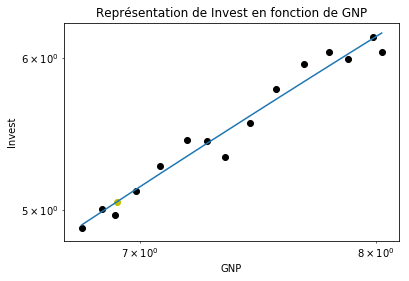

In [11]:
plt.scatter(X,Y,color='k')
plt.plot(X,X*reg.coef_[0][0]+reg.intercept_[0])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('GNP')
plt.ylabel('Invest')
plt.title("Représentation de Invest en fonction de GNP")
plt.scatter(math.log(1000),math.log(1000)*reg.coef_[0][0]+reg.intercept_[0], color='y', alpha=1)
plt.show()

## Question 9

In [12]:
X1=fixed_df["gnp"]
L=[]
for i in range (len(X1)):
    L.append(X1[i])
M=[L]

tM=np.transpose(M)
Gram=np.dot(tM,M)/n
print(np.linalg.matrix_rank(Gram))

1


## Question 10

In [13]:
Z=fixed_df["interest"]
X_=[]
Y_=[]
Z_=[]
col1=np.ones((n,1))
for i in range (len(X)):
    X_.append(X[i])
    Y_.append(Y[i])
    Z_.append(Z[i])
X3=np.asarray(X_).reshape(n,1)
Y3=np.asarray(Y_).reshape(n,1)
Z3=np.asarray(Z_).reshape(n,1)

K = np.concatenate((col1,X3,Z3),axis=1)
m = np.linalg.inv(np.dot(np.transpose(K),K))
m = np.dot(m,np.transpose(K))
m= np.dot(m,np.array(Y).reshape(n,1))

K1=np.linalg.inv(np.dot(np.transpose(K),K))
sigma_carre_2=0
for i in range (n):
    sigma_carre_2+=(Y[i]-(m[0][0]+m[1][0]*K[i][1]+m[2][0]*K[i][2]))**(2)
sigma_carre_2=sigma_carre_2/(n-3)
C=sigma_carre_2*np.linalg.inv(np.dot(np.transpose(K),K))
print('beta0 vaut: '+str(m[0][0])+'\n'+
      'beta1 vaut: '+str(m[1][0])+'\n'+
      'beta2 vaut: '+str(m[2][0])+'\n\n'+
      'La variance de beta0 vaut: '+str(C[0][0])+'\n'+
      'La variance de beta1 vaut: '+str(C[1][1])+'\n'+
      'La variance de beta2 vaut: '+str(C[2][2])+'\n')

Y_=[]
for i in range (n):
    Y_.append(m[0][0]+m[1][0]*K[i][1]+m[2][0]*K[i][2])
numerateur=(Y_-mean(Y))**(2)
denominateur=(Y-mean(Y))**(2)
R1=math.sqrt(sum(numerateur)/sum(denominateur))
print('the coefficient de correlation est: '+str(R1)+'\n')


testbeta0=m[0][0]/math.sqrt(C[0][0])
testbeta1=m[1][0]/math.sqrt(C[1][1])
testbeta2=m[2][0]/math.sqrt(C[2][2])

p_value_b0=2*(1-scipy.stats.t.cdf(abs(testbeta0), n-3))
p_value_b1=2*(1-scipy.stats.t.cdf(abs(testbeta1), n-3))
p_value_b2=2*(1-scipy.stats.t.cdf(abs(testbeta2), n-3))
print('the test statistic value for beta0 is : '+str(testbeta0)+'\n'+
      'and the p value : '+str(p_value_b0)+'\n\n'
      'the test statistic value for beta1 is: '+str(testbeta1)+'\n'+
      'and the p value : '+str(p_value_b1)+'\n\n'
      'the test statistic value for beta2 is: '+str(testbeta2)+'\n'+
      'and the p value : '+str(p_value_b2)+'\n\n'
     )
print('pour beta0 et beta1 la p-value est très petite on peut donc rejeter l hypothese nulle mais pour ce qui est de beta 2 cette p-value est élevée ce qui ne nouspermet pas de rejetter l hypothese nulle')

beta0 vaut: -2.1804547259122575
beta1 vaut: 1.0512426913198811
beta2 vaut: -0.006528879406102708

La variance de beta0 vaut: 0.4387726972412736
La variance de beta1 vaut: 0.010416524891898812
La variance de beta2 vaut: 0.00023544462909531384

the coefficient de correlation est: 0.9814839940990839

the test statistic value for beta0 is : -3.2917532707860544
and the p value : 0.006438367050919602

the test statistic value for beta1 is: 10.30010285263899
and the p value : 2.5995168484449493e-07

the test statistic value for beta2 is: -0.4254947961258638
and the p value : 0.6780071418822775


pour beta0 et beta1 la p-value est très petite on peut donc rejeter l hypothese nulle mais pour ce qui est de beta 2 cette p-value est élevée ce qui ne nouspermet pas de rejetter l hypothese nulle


## Question 11

In [14]:
Interval=scipy.stats.t.interval(0.999, n-3, loc=0, scale=1)
x=Interval[1]
F=np.array([[1,math.log(1000),10]])
H=np.dot(np.dot(F,K1),np.transpose(F))
CI_1000_bas=m[0][0]+m[1][0]*math.log(1000)+m[2][0]*10-x*math.sqrt(sigma_carre_2*H)
CI_1000_haut=m[0][0]+m[1][0]*math.log(1000)+m[2][0]*10+x*math.sqrt(sigma_carre_2*H)

PI_1000_bas=m[0][0]+m[1][0]*math.log(1000)+m[2][0]*10-x*math.sqrt(sigma_carre_2*(1+H))
PI_1000_haut=m[0][0]+m[1][0]*math.log(1000)+m[2][0]*10+x*math.sqrt(sigma_carre_2*(1+H))
print('la valeur de la prediction du log(investement) pour GNP=1000 et Interest=10 est '+str(m[0][0]+m[1][0]*math.log(1000)+m[2][0]*10))
print('the confidence interval is:['+str(CI_1000_bas)+';'+str(CI_1000_haut)+']'+
     '\n'+'the prediction interval is:['+str(PI_1000_bas)+';'+str(PI_1000_haut)+']')

la valeur de la prediction du log(investement) pour GNP=1000 et Interest=10 est 5.015983730483013
the confidence interval is:[4.64018403668841;5.391783424277616]
the prediction interval is:[4.473803343640594;5.558164117325432]


## Question 12

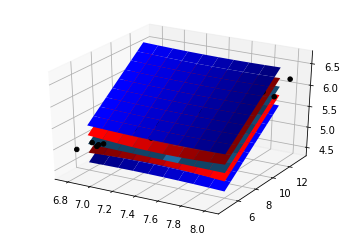

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Interval=scipy.stats.t.interval(0.999, n-3, loc=0, scale=1)
x=Interval[1]
V=np.linspace(6.8,8,10)
U=np.linspace(6,12,10)
CI_bas=np.zeros((len(U),len(V)))
CI_haut=np.zeros((len(U),len(V)))
PI_bas=np.zeros((len(U),len(V)))
PI_haut=np.zeros((len(U),len(V)))
regline=np.zeros((len(U),len(V)))
for i in range (len(U)):
    for j in range (len(V)):
        F=np.array([[1,V[i],U[i]]])
        H=np.dot(np.dot(F,K1),np.transpose(F))
        CI_bas[i][j]=m[0][0]+m[1][0]*V[j]+m[2][0]*U[i]-x*math.sqrt(sigma_carre_2*H)
        CI_haut[i][j]=m[0][0]+m[1][0]*V[j]+m[2][0]*U[i]+x*math.sqrt(sigma_carre_2*H)
        PI_bas[i][j]=m[0][0]+m[1][0]*V[j]+m[2][0]*U[i]-x*math.sqrt(sigma_carre_2*(1+H))
        PI_haut[i][j]=m[0][0]+m[1][0]*V[j]+m[2][0]*U[i]+x*math.sqrt(sigma_carre_2*(1+H))
        regline[i][j]=m[0][0]+m[1][0]*V[j]+m[2][0]*U[i]
U,V=np.meshgrid(U,V)
ax.plot_surface(V,U,regline,label='regression linéaire')
ax.plot_surface(V,U,CI_bas,color='r')
ax.plot_surface(V,U,CI_haut,color='r')
ax.plot_surface(V,U,PI_bas,color='b')
ax.plot_surface(V,U,PI_haut,color='b')
ax.scatter(X,Z,Y,color='k', alpha=1)

plt.show()

## Question 13

In [17]:
X_verif = np.concatenate((X.values.reshape(len(X),1),Z.values.reshape(len(Z),1)),axis=1)
reg = LinearRegression().fit(X_verif,Y.values.reshape(len(Y),1))
beta0= reg.intercept_[0]
beta1= reg.coef_[0][0]
beta2= reg.coef_[0][1]

print("la valeur de beta0 est:"+str(beta0))
print("la valeur de beta1 est:"+str(beta1))
print("la valeur de beta2 est:"+str(beta2))
prediction = reg.predict(np.array([[np.log(1000),10]]))[0][0]
print('la valeur de la prediction du log(investement) pour GNP=1000 et Interest=10 est '+ str(prediction))



la valeur de beta0 est:-2.1804547259113995
la valeur de beta1 est:1.051242691319659
la valeur de beta2 est:-0.006528879406068229
la valeur de la prediction du log(investement) pour GNP=1000 et Interest=10 est 5.015983730482683


**Ces valeurs sont similaires à celles trouvées précédemment à la question 10**